In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\peric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\peric\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
SP_STOP = set(stopwords.words('spanish'))


In [57]:
df = pd.read_csv("comments.csv")

In [58]:
df.head()

,post_id,comment_id,username,comment_text,like_count,timestamp
0,17960507093778558,18039715793256177,NaN,Gran noticia! 👏,0,2025-04-25T15:58:04+0000
1,17960507093778558,18040437554627744,NaN,"Alguien hizo estudio de impacto ambiental, sac...",0,2025-04-25T15:53:56+0000
2,17960507093778558,18014011865707327,NaN,Porque no arreglan primero las cosas que está...,0,2025-04-25T15:49:22+0000
3,17960507093778558,18306351922243406,NaN,❤️👏👏👏,0,2025-04-25T15:37:52+0000
4,17960507093778558,18064217213475366,NaN,"De la suciedad en las calles , autos abandonad...",0,2025-04-25T15:34:41+0000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4062 entries, 0 to 4061
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       4062 non-null   int64 
 1   comment_id    4062 non-null   int64 
 2   username      184 non-null    object
 3   comment_text  4059 non-null   object
 4   like_count    4062 non-null   int64 
 5   timestamp     4062 non-null   object
dtypes: int64(3), object(3)
memory usage: 190.5+ KB


In [60]:
df.describe(include='all')

,post_id,comment_id,username,comment_text,like_count,timestamp
count,4.062000e+03,4.062000e+03,184,4059,4062.000000,4062
unique,NaN,NaN,1,3627,NaN,4054
top,NaN,NaN,sanisidrogob,👏👏👏,NaN,2025-03-21T13:44:57+0000
freq,NaN,NaN,184,57,NaN,2
mean,1.810808e+16,1.805702e+16,NaN,NaN,1.611029,NaN
std,1.898295e+14,1.372938e+14,NaN,NaN,5.144966,NaN
min,1.784246e+16,1.784200e+16,NaN,NaN,0.000000,NaN
25%,1.802533e+16,1.797195e+16,NaN,NaN,0.000000,NaN
50%,1.805393e+16,1.805065e+16,NaN,NaN,0.000000,NaN
75%,1.808095e+16,1.808244e+16,NaN,NaN,2.000000,NaN


In [61]:
df_filtered = df[df['username'].isna()==True]

In [62]:
df_filtered['timestamp'] = pd.to_datetime(df_filtered['timestamp'], errors='coerce')

# Longitudes del comentario
df_filtered['char_len']  = df_filtered['comment_text'].str.len()
df_filtered['word_len']  = df_filtered['comment_text'].str.split().str.len()

C:\Users\peric\AppData\Local\Temp\ipykernel_25148\4254825727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['timestamp'] = pd.to_datetime(df_filtered['timestamp'], errors='coerce')
C:\Users\peric\AppData\Local\Temp\ipykernel_25148\4254825727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['char_len']  = df_filtered['comment_text'].str.len()
C:\Users\peric\AppData\Local\Temp\ipykernel_25148\4254825727.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

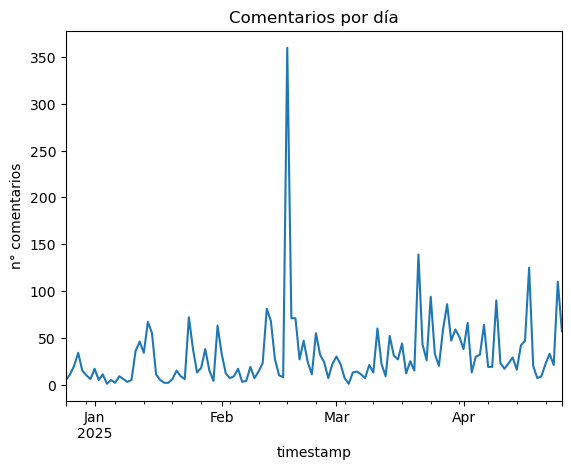

In [63]:
fig, ax = plt.subplots()
(df_filtered
 .set_index('timestamp')
 .resample('D')['comment_id']     # comentarios por día
 .count()
 .plot(ax=ax, lw=1.5))
ax.set_title('Comentarios por día')
ax.set_ylabel('n° comentarios')
plt.show()

# Luego ver por que hay un pico tan grande a mitad de febrero

C:\Users\peric\AppData\Local\Temp\ipykernel_25148\836864640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour'] = df_filtered['timestamp'].dt.hour


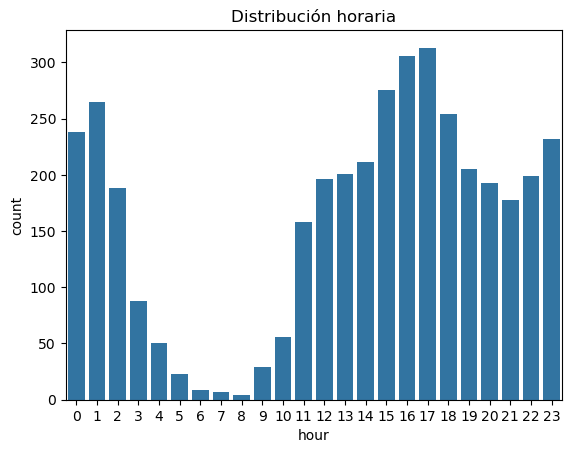

In [64]:
# Horas pico

df_filtered['hour'] = df_filtered['timestamp'].dt.hour
sns.countplot(data=df_filtered, x='hour')
plt.title('Distribución horaria')
plt.show()

In [65]:
df_filtered

,post_id,comment_id,username,comment_text,like_count,timestamp,char_len,word_len,hour
0,17960507093778558,18039715793256177,NaN,Gran noticia! 👏,0,2025-04-25 15:58:04+00:00,15.0,3.0,15
1,17960507093778558,18040437554627744,NaN,"Alguien hizo estudio de impacto ambiental, sac...",0,2025-04-25 15:53:56+00:00,82.0,13.0,15
2,17960507093778558,18014011865707327,NaN,Porque no arreglan primero las cosas que está...,0,2025-04-25 15:49:22+00:00,326.0,58.0,15
3,17960507093778558,18306351922243406,NaN,❤️👏👏👏,0,2025-04-25 15:37:52+00:00,5.0,1.0,15
4,17960507093778558,18064217213475366,NaN,"De la suciedad en las calles , autos abandonad...",0,2025-04-25 15:34:41+00:00,189.0,32.0,15
...,...,...,...,...,...,...,...,...,...
4057,17986289807619587,18020717024351691,NaN,Feliz Navidad ❤️,1,2024-12-25 18:52:19+00:00,16.0,3.0,18
4058,17986289807619587,18157895497329931,NaN,Feliz Navidad!!!,2,2024-12-25 16:43:58+00:00,16.0,2.0,16
4059,17986289807619587,18061998256721823,NaN,Feliz Navidad!! Los mejores deseos 🥂,2,2024-12-25 16:16:33+00:00,36.0,6.0,16
4060,17986289807619587,18102648661472703,NaN,Feliz Navidad! ❤️,2,2024-12-25 15:26:30+00:00,17.0,3.0,15


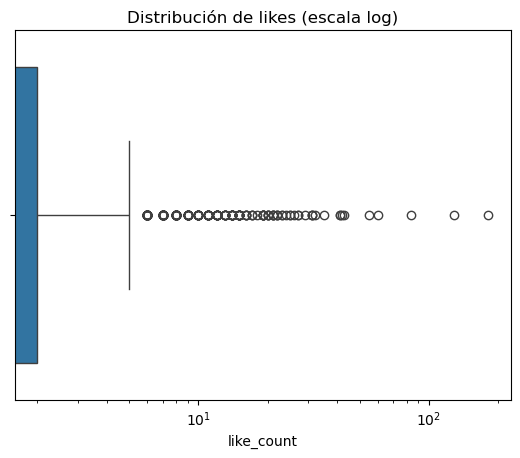

,count,mean,sum
comment_id,,,
18056649299012754,1,181.0,181
18053147234134132,1,129.0,129
18033172172263363,1,84.0,84
17938554731967564,1,60.0,60
18125791801414371,1,55.0,55


In [66]:
# Suma de likes totales en los comentarios

sns.boxplot(data=df_filtered, x='like_count')
plt.xscale('log')
plt.title('Distribución de likes (escala log)')
plt.show()

likes_post = (df_filtered.groupby('comment_id')['like_count']
                .agg(['count', 'mean', 'sum'])
                .sort_values('sum', ascending=False))
likes_post.head()

## Analisis de texto

In [67]:
nltk.download('punkt_tab')

def limpiar(texto):
    texto = texto.lower()  # quitar urls
    texto = texto.translate(str.maketrans('', '', string.punctuation+'¡¿'))
    tokens = word_tokenize(texto, language='spanish')
    tokens = [t for t in tokens if t not in SP_STOP and t.isalpha()]
    return tokens

df_filtered['tokens'] = df_filtered['comment_text'].fillna('').apply(limpiar)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\peric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
C:\Users\peric\AppData\Local\Temp\ipykernel_25148\2764625560.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tokens'] = df_filtered['comment_text'].fillna('').apply(limpiar)


In [68]:
# Palabras más frecuentes
todo = Counter([tok for sub in df_filtered['tokens'] for tok in sub])
pd.DataFrame(todo.most_common(30), columns=['token', 'freq']).head(30)

,token,freq
0,san,329
1,siempre,312
2,si,301
3,isidro,292
4,hace,218
5,q,214
6,gracias,211
7,calle,145
8,bien,142
9,años,131


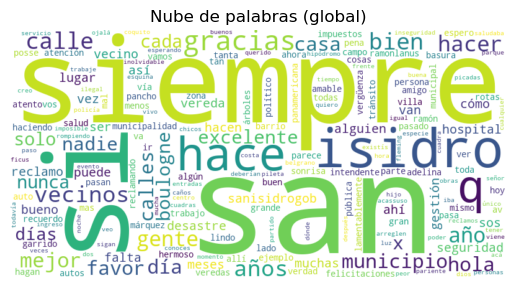

In [69]:
# WordCloud rápido
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(todo)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off'); plt.title('Nube de palabras (global)'); plt.show()

In [70]:
# Bigrams frecuentes
from nltk.util import ngrams
bigrams = Counter(ngr for sub in df_filtered['tokens'] for ngr in ngrams(sub, 2))
pd.DataFrame(bigrams.most_common(20), columns=['bigram','freq']).head(20)

,bigram,freq
0,"(san, isidro)",288
1,"(villa, adelina)",44
2,"(municipalidad, san)",38
3,"(muchas, gracias)",37
4,"(hace, años)",36
5,"(nadie, hace)",34
6,"(isidro, si)",33
7,"(vía, pública)",33
8,"(si, sos)",32
9,"(hace, meses)",30


In [71]:
CLUES = [
    'arreglen', 'arreglar', 'arreglan', 'arreglo', 'arreglaron',
    'reclamo', 'reclaman', 'queja', 'problema', 'cuando', 'suciedad',
    'basura', 'mal', 'pésimo', 'pesimo', 'nunca', 'tardan', 'abandona', 'inseguridad',
    'baches', 'calles', 'falta', 'servicio', 'horrible', 'vergüenza', 'verguenza', 'denuncia'
]
regex = re.compile(r'\b(' + '|'.join(CLUES) + r')\b', flags=re.IGNORECASE)

df_filtered['is_complaint_kw'] = df_filtered['comment_text'].fillna('').str.contains(regex)

C:\Users\peric\AppData\Local\Temp\ipykernel_25148\3766997060.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered['is_complaint_kw'] = df_filtered['comment_text'].fillna('').str.contains(regex)
C:\Users\peric\AppData\Local\Temp\ipykernel_25148\3766997060.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['is_complaint_kw'] = df_filtered['comment_text'].fillna('').str.contains(regex)


In [72]:
complaint_rate = df_filtered['is_complaint_kw'].mean()
print(f"Porcentaje de comentarios que mencionan quejas: {complaint_rate:.2%}")

Porcentaje de comentarios que mencionan quejas: 15.11%


## Analisis de sentimiento con VADER

In [73]:
sia = SentimentIntensityAnalyzer()
df_filtered['sentiment'] = df_filtered['comment_text'].fillna('').apply(lambda x: sia.polarity_scores(x)['compound'])

C:\Users\peric\AppData\Local\Temp\ipykernel_25148\1446558227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment'] = df_filtered['comment_text'].fillna('').apply(lambda x: sia.polarity_scores(x)['compound'])


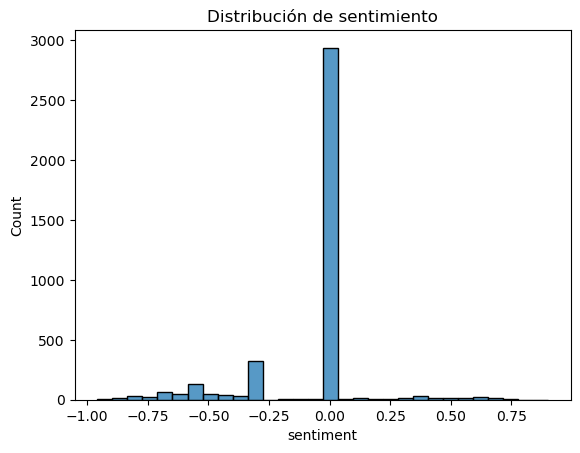

In [74]:
sns.histplot(df_filtered['sentiment'], bins=30)
plt.title('Distribución de sentimiento')
plt.show()

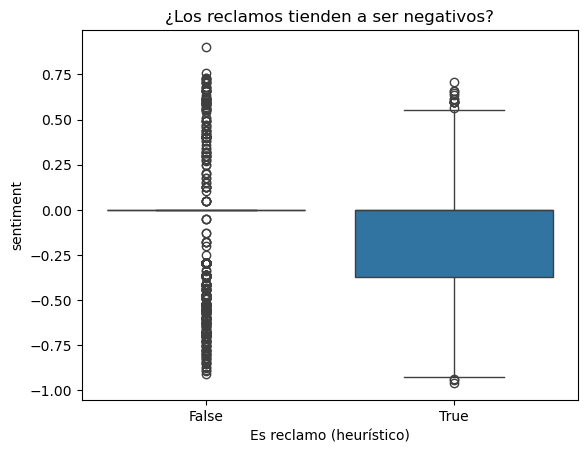

In [75]:
# Correlación sentimiento vs. flag de reclamo
sns.boxplot(data=df_filtered, x='is_complaint_kw', y='sentiment')
plt.title('¿Los reclamos tienden a ser negativos?')
plt.xlabel('Es reclamo (heurístico)')
plt.show()

<Axes: >

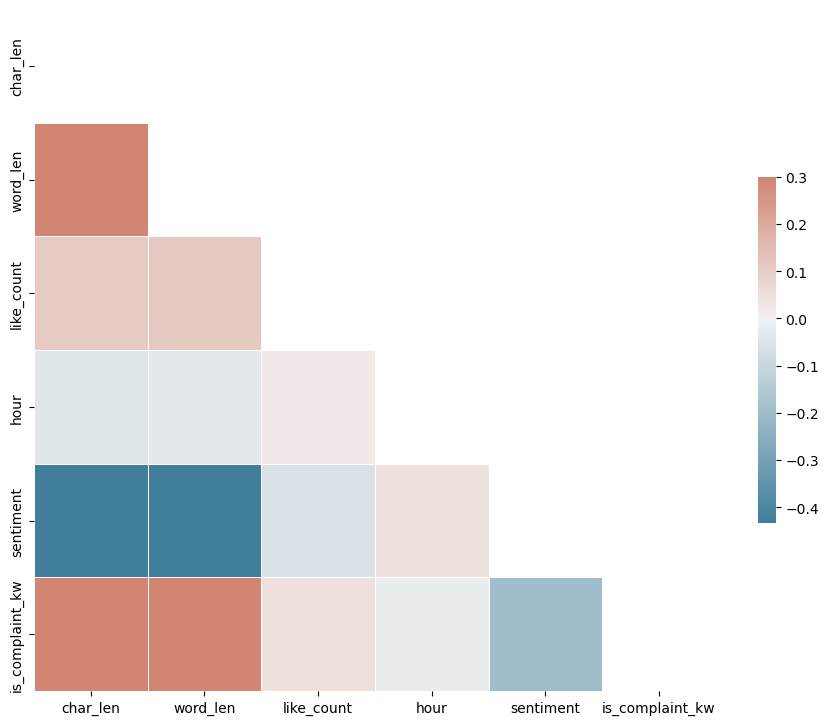

In [76]:
eda_features = df_filtered[['char_len', 'word_len', 'like_count', 'hour', 'sentiment', 'is_complaint_kw']]
corr = eda_features.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [77]:
# Tabla comparativa de métricas entre reclamos y no reclamos
comp = (df_filtered.groupby('is_complaint_kw')
          .agg(avg_likes=('like_count','mean'),
               median_len=('word_len','median'),
               avg_sent=('sentiment','mean'),
               comentarios=('comment_id','count')))
comp

,avg_likes,median_len,avg_sent,comentarios
is_complaint_kw,,,,
False,1.560450,7.0,-0.051092,3292
True,2.286689,29.0,-0.178451,586


In [78]:
df_filtered[df_filtered['sentiment']<0]

,post_id,comment_id,username,comment_text,like_count,timestamp,char_len,word_len,hour,tokens,is_complaint_kw,sentiment
2,17960507093778558,18014011865707327,NaN,Porque no arreglan primero las cosas que está...,0,2025-04-25 15:49:22+00:00,326.0,58.0,15,"[arreglan, primero, cosas, rotas, caso, dos, m...",True,-0.4724
4,17960507093778558,18064217213475366,NaN,"De la suciedad en las calles , autos abandonad...",0,2025-04-25 15:34:41+00:00,189.0,32.0,15,"[suciedad, calles, autos, abandonados, contene...",True,-0.5574
22,18049674734346443,18045436619144261,NaN,@sosa.mariano ese no es Mario que trabajaba en...,0,2025-04-25 03:13:13+00:00,57.0,10.0,3,"[sosamariano, mario, trabajaba, coquito]",False,-0.2960
24,18049674734346443,18076508014837944,NaN,QUE DECISIÓN VA A TOMAR EL MUNICIPIO con respe...,0,2025-04-25 02:49:31+00:00,345.0,65.0,2,"[decisión, va, tomar, municipio, respecto, pic...",False,-0.7470
25,18049674734346443,18081962035709411,NaN,"Podras haber mejores panchos, pero Coquito tie...",0,2025-04-25 02:22:00+00:00,260.0,44.0,2,"[podras, haber, mejores, panchos, coquito, his...",True,-0.2960
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,18066529195747137,18290034331215203,NaN,Hacer controles en avenidas… es un show. V. Lo...,11,2024-12-28 16:27:21+00:00,104.0,21.0,16,"[hacer, controles, show, v, lopez, hace, calle...",True,-0.4466
4007,18066529195747137,18072638803635934,NaN,Si quieren atrapar a muchos en infracción vaya...,3,2024-12-28 16:16:36+00:00,241.0,42.0,16,"[si, quieren, atrapar, infracción, vayan, siem...",True,-0.2960
4016,18042720233014010,18042997904191080,NaN,@traversomargarita no gracias,0,2024-12-29 01:19:59+00:00,29.0,3.0,1,"[traversomargarita, gracias]",False,-0.2960
4036,18037154117346020,17958929657747987,NaN,Deberían facilitar los turnos para los ciudada...,0,2025-01-22 13:28:23+00:00,272.0,50.0,13,"[deberían, facilitar, turnos, ciudadanos, pare...",True,-0.5267


In [80]:
df_filtered[df_filtered['comment_id']==18290034331215203]['comment_text'].to_list()

['Hacer controles en avenidas… es un show. V. Lopez lo hace en calles de barrios …. Donde NO SE LO ESPERAN']

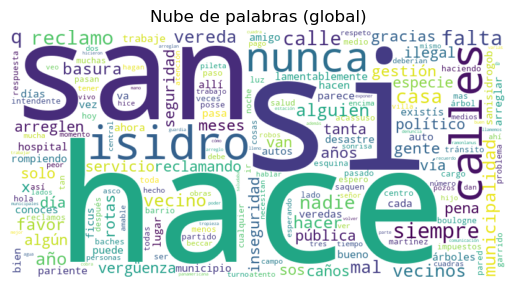

In [82]:
todo_quejas = Counter([tok for sub in df_filtered[df_filtered['is_complaint_kw']]['tokens'] for tok in sub])
pd.DataFrame(todo_quejas.most_common(30), columns=['token', 'freq']).head(30)

wc_quejas = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(todo_quejas)
plt.imshow(wc_quejas, interpolation='bilinear')
plt.axis('off'); plt.title('Nube de palabras (global)'); plt.show()